<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/noise_with_different_intensities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(<Axes: title={'center': 'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

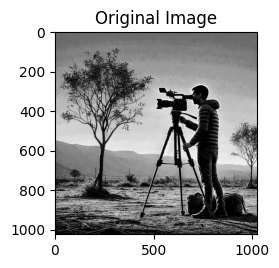

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('/content/DALL·E 2025-03-28 12.03.23 - A grayscale image of a cameraman standing behind a tripod-mounted camera, capturing a scene in an outdoor environment with trees and a distant backgro.webp', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,6))
plt.subplot(1,4,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')

In [11]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + gauss, 0, 255).astype(np.uint8)
    return noisy_image

In [12]:
# Ideal High-Pass Filter
def ideal_highpass(img, D0):
    fft_img = np.fft.fft2(img)
    fft_img_shifted = np.fft.fftshift(fft_img)
    M, N = img.shape

    # Create a circular high-pass mask
    u, v = np.meshgrid(range(-M//2, M//2), range(-N//2, N//2), indexing='ij')
    H = (u**2 + v**2 > D0**2).astype(int)

    # Apply filter and inverse FFT
    filtered_img = fft_img_shifted * H
    final_img = np.fft.ifft2(np.fft.ifftshift(filtered_img))

    return np.abs(final_img)

In [14]:
# Adaptive Local Noise Reduction Filter
def adaptive_local_noise_reduction(img, window_size=3, noise_var=20):
    img = img.astype(np.float32)
    mean_filter = cv2.blur(img, (window_size, window_size))
    var_filter = cv2.blur(img**2, (window_size, window_size)) - mean_filter**2
    noise_ratio = var_filter / (var_filter + noise_var)

    filtered_img = mean_filter + noise_ratio * (img - mean_filter)
    return np.clip(filtered_img, 0, 255).astype(np.uint8)

In [15]:
# Apply transformations
noisy_img = add_gaussian_noise(img)
D0 = 30  # Cutoff frequency
highpass_result = ideal_highpass(noisy_img, D0)
noise_reduction_result = adaptive_local_noise_reduction(noisy_img)

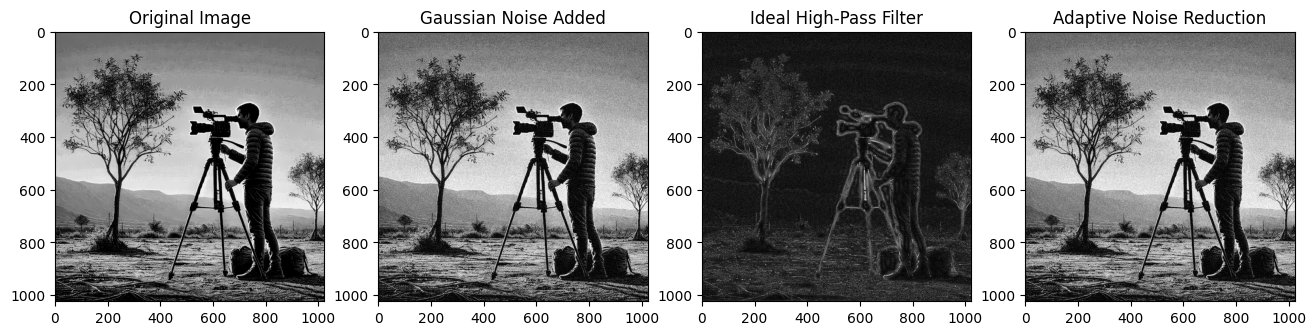

In [17]:
plt.figure(figsize=(16, 8))  # Increased figure size
plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 4, 2), plt.imshow(noisy_img, cmap='gray'), plt.title('Gaussian Noise Added')
plt.subplot(1, 4, 3), plt.imshow(highpass_result, cmap='gray'), plt.title('Ideal High-Pass Filter')
plt.subplot(1, 4, 4), plt.imshow(noise_reduction_result, cmap='gray'), plt.title('Adaptive Noise Reduction')
plt.show()